# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


In [2]:
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

In [3]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# defining a better print function
def print_pretty(text):
    """ Prints 30 asterisks (*) before and after the given text on separate lines."""
    print('*'*30)
    print(text)
    print('*'*30)

# importing data and checking the dtypes
data = pd.read_csv('product_sales.csv')
print_pretty(data.dtypes)
data.head()

******************************
week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object
******************************


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


******************************
number of na in week:
 0
******************************
******************************
unique values in week:
 count    15000.000000
mean         3.098267
std          1.656420
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: week, dtype: float64
******************************


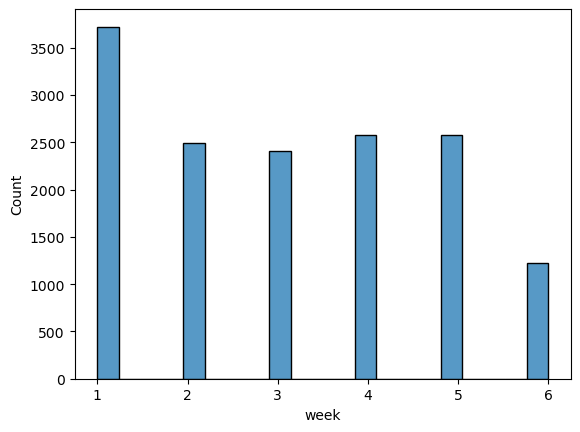

In [4]:
### checking week
print_pretty(f"number of na in week:\n {data['week'].isna().sum()}")
print_pretty(f"unique values in week:\n {data['week'].describe()}")
## plotting week distribution
sns.histplot(data=data, x='week')
plt.show()

******************************
value counts for sales_method: 
sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64
******************************
******************************
value counts for sales_method: 
sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64
******************************
******************************
value counts for sales_method: 
category
******************************


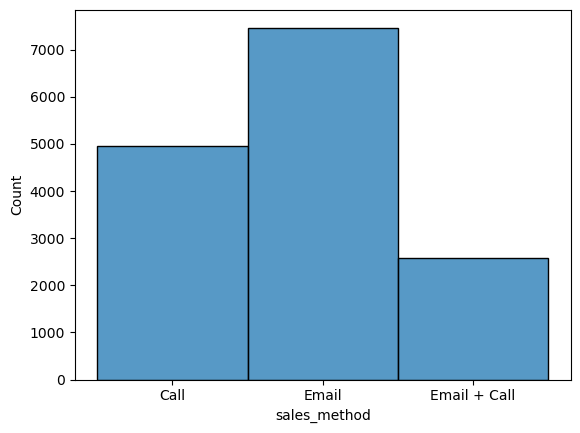

In [5]:
### sales_method should be changed to category and cleaned
print_pretty(f"value counts for sales_method: \n{data['sales_method'].value_counts()}")
## plotting sales_method distribution
data['sales_method'] = data['sales_method'].str.replace('em ','email ').str.title().astype('category')

print_pretty(f"value counts for sales_method: \n{data['sales_method'].value_counts()}")
print_pretty(f"value counts for sales_method: \n{data['sales_method'].dtype}")
sns.histplot(data=data, x='sales_method')
plt.show()

In [6]:
### customer_id should be changed to category
print_pretty(f"number of na in customer_id: {data['customer_id'].isna().sum()}")
print_pretty(f"number of duplicated in customer_id: {data.duplicated(subset='customer_id').sum()}")
data['customer_id'] = data['customer_id'].astype('category')

******************************
number of na in customer_id: 0
******************************
******************************
number of duplicated in customer_id: 0
******************************


******************************
number of na in nb_sold: 0
******************************
******************************
number of na in nb_sold: 
count    15000.000000
mean        10.084667
std          1.812213
min          7.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: nb_sold, dtype: float64
******************************


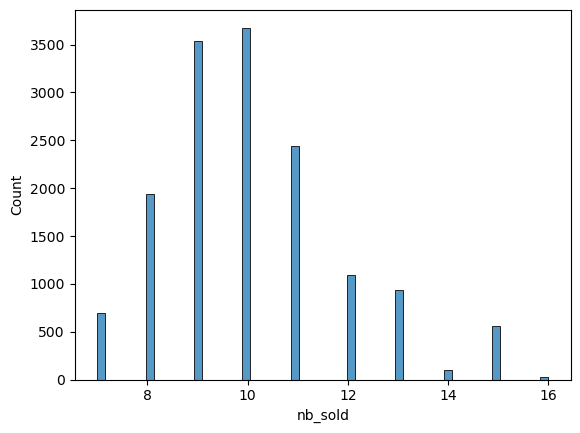

In [7]:
### checking nb_sold
print_pretty(f"number of na in nb_sold: {data['nb_sold'].isna().sum()}")
print_pretty(f"number of na in nb_sold: \n{data['nb_sold'].describe()}")
## plotting nb_sold distribution
sns.histplot(data=data, x='nb_sold')
plt.show()

******************************
number of na in revenue grouped by sales_method: sales_method
Call            0.036477
Email           0.072864
Email + Call    0.135692
Name: revenue, dtype: float64
******************************


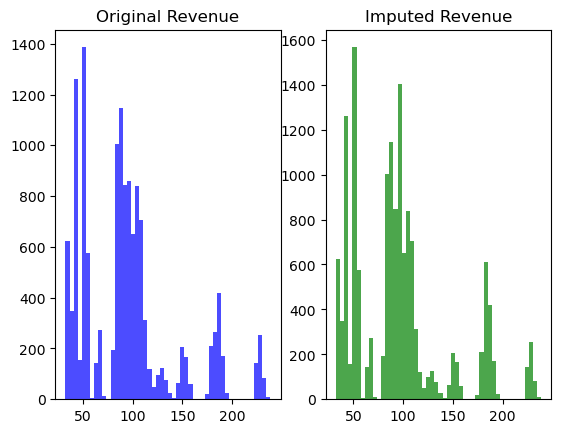

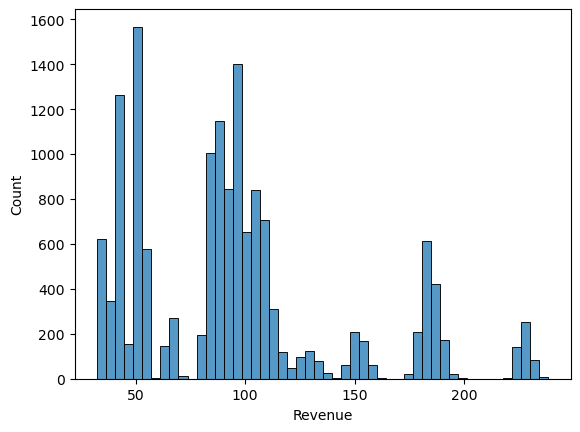

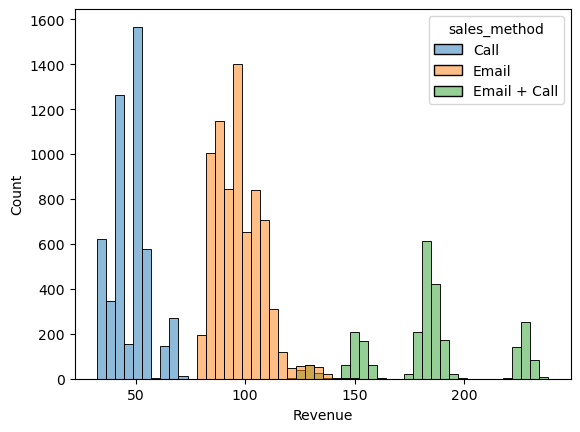

In [8]:
### checking revenue and imputing missing values
print_pretty(f"number of na in revenue grouped by sales_method: \
{data.groupby('sales_method', observed=False)['revenue'].apply(lambda x: x.isna().sum()/len(x))}")

data['revenue_filled'] = data.groupby('sales_method', observed=False)['revenue'].\
transform(lambda x: x.fillna(x.median()))

## plotting revenue and imputed columns 
fig, ax = plt.subplots(1,2)
ax[0].hist(data['revenue'], bins=50, color='blue', alpha=0.7)
ax[1].hist(data['revenue_filled'], bins=50, color='green', alpha=0.7)
ax[0].set_title('Original Revenue')
ax[1].set_title('Imputed Revenue')
plt.savefig('FIG/revenue_impute.png')
plt.show()

## plotting revenue histogram
sns.histplot(
    data=data, 
    x='revenue_filled', 
    bins = 50
)
plt.gca().set_xlabel("Revenue")
plt.savefig('FIG/revenue_hist.png')
plt.show()

## plotting revenue histogram grouped by sales_method
sns.histplot(
    data=data, 
    x='revenue_filled',  
    hue='sales_method',  
    bins = 50
)
plt.gca().set_xlabel("Revenue")
plt.savefig('FIG/revenue_hist_grouped.png')
plt.show()

******************************
number of na in years_as_customer: 0
******************************
******************************
number of na in years_as_customer: 
13741    63
13800    47
Name: years_as_customer, dtype: int64
******************************
******************************
number of na in years_as_customer: 
week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
revenue_filled       0
dtype: int64
******************************


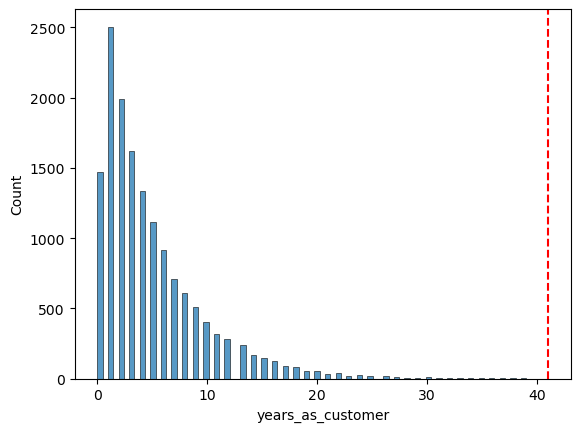

In [9]:
### checking years_as_customer
print_pretty(f"number of na in years_as_customer: {data['years_as_customer'].isna().sum()}")
print_pretty(f"number of na in years_as_customer: \n{data[data['years_as_customer']>(2025-1984)]['years_as_customer']}")
data['years_as_customer'] = data['years_as_customer'].mask(data['years_as_customer']>2025-1984, np.nan)

print_pretty(f"number of na in years_as_customer: \n{data[data['years_as_customer']>(2025-1984)].count()}")
## plotting years_as_customer distribution
sns.histplot(data=data, x='years_as_customer')
plt.axvline(x=2025-1984, color='r', linestyle='--')
plt.savefig('FIG/year_as_customer_fig.png')
plt.show()

******************************
number of na in nb_site_visits: 0
******************************
******************************
number of na in nb_site_visits: count    15000.000000
mean        24.990867
std          3.500914
min         12.000000
25%         23.000000
50%         25.000000
75%         27.000000
max         41.000000
Name: nb_site_visits, dtype: float64
******************************


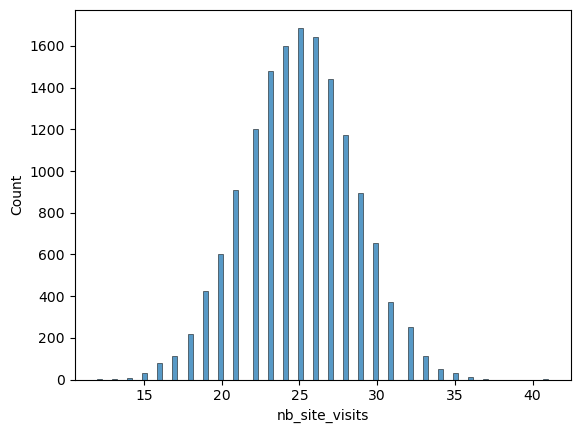

In [10]:
### checking nb_site_visits
print_pretty(f"number of na in nb_site_visits: {data['nb_site_visits'].isna().sum()}")
print_pretty(f"number of na in nb_site_visits: {data['nb_site_visits'].describe()}")
## plotting nb_site_visits distribution
sns.histplot(data=data, x='nb_site_visits')
plt.show()

******************************
number of na in state: 0
******************************


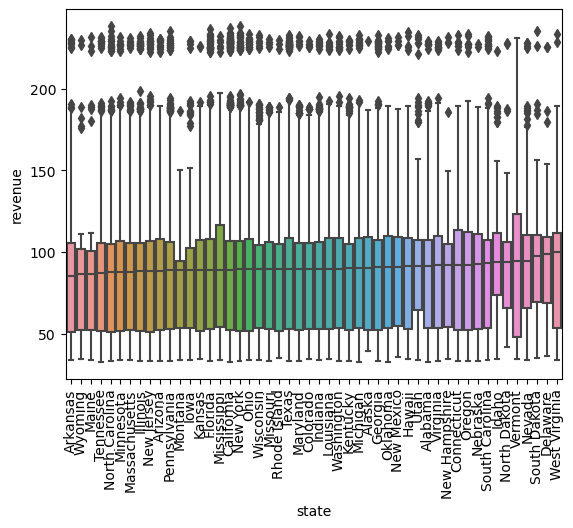

In [11]:
### checking state
print_pretty(f"number of na in state: {data['state'].isna().sum()}")
data['state'] = data['state'].astype('category')
median_order = data.groupby("state", observed=False)["revenue"].median().sort_values().index
sns.boxplot(
    data=data,
    x='state',
    y='revenue',
    order=median_order
)
plt.xticks(rotation=90)
plt.show()

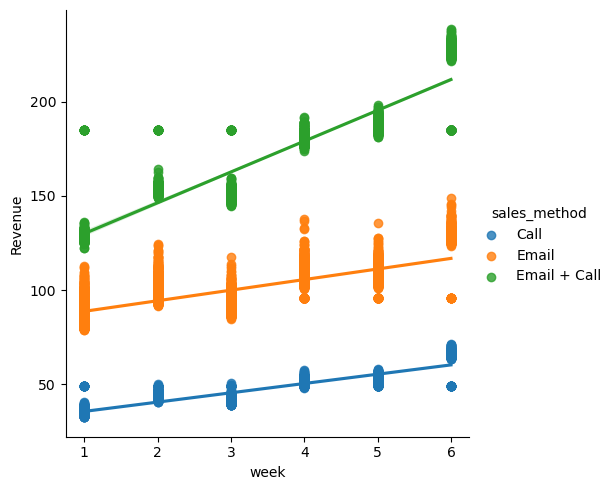

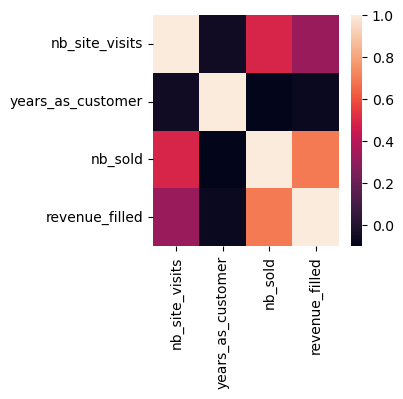

******************************
                        df        sum_sq       mean_sq              F  \
sales_method           2.0  3.142872e+07  1.571436e+07  283302.936735   
week                   1.0  1.701203e+06  1.701203e+06   30669.770428   
week:sales_method      2.0  5.540564e+05  2.770282e+05    4994.343324   
years_as_customer      1.0  1.012978e+03  1.012978e+03      18.262252   
nb_site_visits         1.0  1.786278e+04  1.786278e+04     322.035177   
Residual           14990.0  8.314713e+05  5.546840e+01            NaN   

                         PR(>F)  
sales_method       0.000000e+00  
week               0.000000e+00  
week:sales_method  0.000000e+00  
years_as_customer  1.936722e-05  
nb_site_visits     2.902521e-71  
Residual                    NaN  
******************************
******************************
       Contrast      A             B    U-val  p-corr    hedges
0  sales_method   Call         Email      0.0     0.0 -4.969941
1  sales_method   Call  Email

In [12]:
## plotting revenue lm grouped by sales_method
sns.lmplot(
    data=data, 
    y='revenue_filled',
    x='week',
    hue='sales_method'
)
plt.gca().set_ylabel("Revenue")
plt.savefig('FIG/revenue_week.png')
plt.show()

## checking internal dependencies 
plt.figure(figsize=(3, 3))
sns.heatmap(data[['nb_site_visits','years_as_customer','nb_sold','revenue_filled']].corr())
plt.savefig('FIG/heatmap.png', bbox_inches="tight")
plt.show()

## linear modeling of revenue to see the effects of the week
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

mdl_revenue = ols(
    data=data, 
    formula = 'revenue_filled ~ week * sales_method + years_as_customer + nb_site_visits',
).fit()
print_pretty(anova_lm(mdl_revenue))

# Perform pairwise comparisons
import pingouin as pg
pairwise = pg.pairwise_tests(
    dv='revenue_filled',
    between='sales_method',
    data=data,
    parametric=False,
    padjust='bonf'
)[['Contrast','A','B','U-val','p-corr','hedges']]
print_pretty(pairwise)

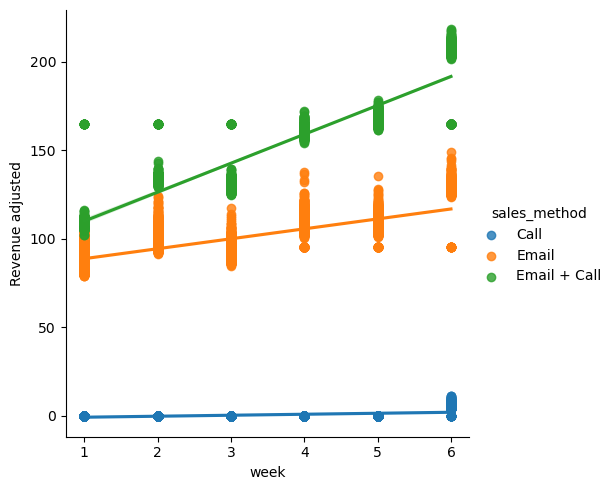

******************************
       Contrast      A             B     U-val  p-corr     hedges
0  sales_method   Call         Email       0.0     0.0 -11.421572
1  sales_method   Call  Email + Call       0.0     0.0 -10.290828
2  sales_method  Email  Email + Call  176381.5     0.0  -4.033516
******************************


In [13]:
## finding a relevant metric
conditions = [
    data['sales_method'] == 'Email',
    data['sales_method'] == 'Call',
    data['sales_method'] == 'Email + Call',
]
choice = [0,30,10]
data['time_used'] = np.select(conditions, choice)

time_cost=2
data['revenue_adj'] = np.maximum(data['revenue_filled']-data['time_used']*time_cost,0)
#data.head()


## plotting revenue lm grouped by sales_method
sns.lmplot(
    data=data, 
    y='revenue_adj',
    x='week',
    hue='sales_method'
)
plt.gca().set_ylabel("Revenue adjusted")
plt.savefig('FIG/revenue_adj_week.png')
plt.show()

# Perform pairwise comparisons
import pingouin as pg
pairwise = pg.pairwise_tests(
    dv='revenue_adj',
    between='sales_method',
    data=data,
    parametric=False,
    padjust='bonf'
)[['Contrast','A','B','U-val','p-corr','hedges']]
print_pretty(pairwise)

## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

# 1. Data Validation
I validated the data based on the criteria outlined in the data description. Below, I will describe the steps and their justifications in detail.
## 1.1. Sales_method column
The column 'sales_method' needed to be transformed to 'category', as it represents three different experimental conditions that were possible. Furthermore, the inconsistencies in naming conditions have been resolved, so there are now only three conditions, all represented in lowercase. 
## 1.2. Customer_id column 
There were no missing values or duplicated values in 'customer_id'. However, the column 'customer_id' was transformed to 'category', as the participants' IDs serve as unique identifiers.
## 1.3. Revenue column
The column revenue has a significant number of missing values. Since the revenue may vary based on the products sold, which are not available in the dataset, it is not possible to calculate the revenue accurately. Furthermore, based on the current information, it is not possible to infer whether data is missing at random (MAR) or missing not at random (MNAR). I assume here that the data is **MAR**.  Notably, the number of missing values differs between sales-method conditions. 

### Table 1. Missing data in the revenue column
| Sales Method   |Proportion of NA in Revenue|
|----------------|---------------------------|
| Call           |                  0.036477 |
| Email          |                  0.072864 |
| Email + Call   |                  0.135692 |

As the revenue is a critical variable, I impute the missing values based on *the median of revenue grouped by the sales_method condition*. I chose median over mean because the data does not have a normal distribution, and outliers might affect the mean strongly. 
This step did not change the revenue distribution, as can be seen below.

### Figure 1A. Revenue Histogram before and after imputation
![Revenue distribution before and after imputation](revenue_impute.png)


## 1.4 Years_as_customer column 
As the company was founded in 1984, the maximum 'years_as_customer' can be 2025-1984=41. There are two values that are outside the reasonable range (63 and 47). As years_as_customer is not a critical variable for the current analysis, these two values are simply replaced with NA.
### Figure 1B. The range limit for the years_as_customer column
![years_as_customer_figuer](year_as_customer_fig.png)
## 1.5. State column
The column state is also transformed into a category, as it represents the existing states. 
## 1.6. Other columns
Finally, the three columns did not require any cleaning or changes. These were: 
1. 'week': all the values are in the correct range (1-6) and there are no missing values. The type is also correct (int).
2. 'nb_site_visits': There are no missing values. The type is correct (int). Also, the range is between 12 and 41, which seems reasonable. 
3. 'nb_sold': There are no missing values. The type is correct (int). The numbers in 'nb_sold' range between 7 and 16, which seems reasonable. 




# 2. Exploratory Analysis
## 2.1. Customers and their characteristics
Next, we can look at the number of customers that were allocated to each sale method. From Table 1, one can see that most customers were allocated to the email condition. This is probably due to the fact that this method requires the least amount of effort.    

### Table 2. number of customers in different sales methods
| Sales Method   | Count |
|----------------|-------|
| email          | 7466  |
| call           | 4962  |
| email + call   | 2572  |

## 2.2. Revenue
First, we look at the revenue column. The distribution of the revenue column (after imputing missing values) is shown below.

![revenue_general](revenue_hist.png)
### Figure 2. Revenue histogram

If one looks at the distribution grouped by sales method, it is highly plausible that different sales methods might result in different average revenues.

![revenue_grouped](revenue_hist_grouped.png)
### Figure 3. Revenue histogram grouped by sales methods

## 2.4. Checking the correlations between different variables
One can also ask whether other variables correlate with revenue or the number of sales. However, the data shows (Fig. 4) that the correlations between revenue and years as a customer or the number of site visits are negligible.

![corr_figure](heatmap.png)
### Figure 4. Revenue over time, grouped by sales methods

## 2.5. Tracking revenue over time
Following the revenue differences between groups, it is reasonable to check whether the revenue changed over time differently in each sales method. In Fig. 5, it is clear that the three conditions differ. 


![revenue_time](revenue_week.png)
### Figure 5. Revenue over time, grouped by sales methods

To ensure that the observed differences are not due to random variance in the data, I employed a linear model to test this hypothesis statistically. Although the revenue data is not normally distributed, the approximation is sufficiently accurate to proceed with the model. The model used is:
```
mdl_revenue = ols(
    data=data, 
    formula = 'revenue_filled ~ week * sales_method + years_as_customer + nb_site_visits',
    groups=data["customer_id"]
).fit()
```

The results (Table 3) show that, even after considering the number of site visits and years as a customer as covariates in the model, the effects of the sales method and the interaction between the sales method and week are strongly significant.   

### Table 3. The ANOVA results of the LM model investigating the variables that affect revenue
| Term                | df  | F              | PR(>F)         |
|---------------------|------|----------------|----------------|
| sales_method        | 2.0  | 283346.548574  | 0.000000e+00   |
| week                | 1.0  | 30672.404629   | 0.000000e+00   |
| week:sales_method   | 2.0  | 4994.842837    | 0.000000e+00   |
| years_as_customer   | 1.0  | 17.714240      | 2.581930e-05   |
| nb_site_visits      | 1.0  | 322.098926     | 2.812442e-71   |


Further, non-parametric pairwise comparison shows that the differences between different sales methods are significant (Table 4).

### Table 4. The pairwise comparison between different sales methods using imputed revenue
|   | Contrast      | A           | B           |       U-val | p-corr |   hedges |
|---|---------------|-------------|-------------|-------------|--------|----------|
| 0 | sales_method  | email       | email + call|     15854.5 | 0.0    | -5.241444|
| 1 | sales_method  | email       | call        | 37046292.0  | 0.0    |  4.969941|
| 2 | sales_method  | email + call| call        | 12762264.0  | 0.0    |  7.903535|

Based on these results, one can say that call+email is the best sales method, followed by email-only and the call-only methods.

# 3. Definition of a metric for the business to monitor
## 3.1. Adjusted revenue
For developing a metric that can be used to evaluate these sales methods, we need to consider the time costs for the business. Therefore, we can calculate an adjusted revenue that will subtract the time costs from the actual revenue. To achieve this, I added a column to the data based on the time that each sales method requires, as shown below.

```
conditions = [
    data['sales_method'] == 'email',
    data['sales_method'] == 'call',
    data['sales_method'] == 'email + call',
]
choice = [0,30,10]
data['time_used'] = np.select(conditions, choice)
```

After this, we can calculate the adjusted revenue. However, we need to assume the cost per minute. I assumed that the cost per minute would be 2$. Then, the adjusted revenue will be the actual revenue minus the costs.
```
time_cost=2
data['revenue_adj'] = np.maximum(data['revenue_filled']-data['time_used']*time_cost,0)
```

## 3.2. Re-doing analysis using adjusted revenue
Now, if I repeat the analysis that I have done before to check the revenue, we can see that still email + call is better than email only. However, the call-only method is pretty ineffective (Fig. 6).

![revenue_adj_time](revenue_adj_week.png)
### Figure 6. Adjusted revenue over time, grouped by sales methods


Furthermore, if we examine the differences statistically, we can see that they are significant.

### Table 5. The pairwise comparison between different sales methods using adjusted revenue
|   | Contrast      | A           | B           |       U-val | p-corr |   hedges |
|---|---------------|-------------|-------------|-------------|--------|----------|
| 0 | sales_method  | email       | email + call|    176381.5 | 0.0    | -4.033516|
| 1 | sales_method  | email       | call        | 37046292.0  | 0.0    | 11.421572|
| 2 | sales_method  | email + call| call        | 12762264.0  | 0.0    | 10.290828|


In the future, the cost per minute should be changed if necessary. But generally, the tests and analyses will remain the same. 

## 3.2. Conclusion
Based on the current data, one can clearly conclude that the combination of email and call is the most effective sales method, followed by email alone. As the differences between the sales methods are significant, it is reasonable to continue using 'email+call' to achieve higher sales, and avoid the call-only method. 